In [17]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [18]:
import pandas as pd

df = pd.read_csv("data.csv", encoding="ISO-8859-1")
print(df.head())


  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3       

/tmp/ipython-input-1028546109.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="ISO-8859-1")


In [19]:
print(df.columns)


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [20]:
x = df["no2"].dropna().values


In [21]:
r = 102303531  # replace with your roll number

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print(a_r, b_r)


0.05 0.6


In [22]:
import numpy as np
# transform x into z
z = x + a_r * np.sin(b_r * x)


In [23]:
#Estimate mean and variance
mu = np.mean(z)
sigma2 = np.var(z)

print("Mean (mu):", mu)
print("Variance:", sigma2)


Mean (mu): 25.810230670014192
Variance: 342.351963188974


In [24]:
lambda_ = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)

print("lambda:", lambda_)
print("c:", c)


lambda: 0.001460485271772799
c: 0.02156123606454654


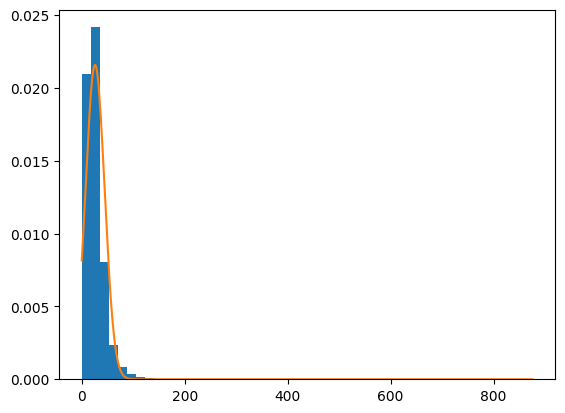

In [25]:
#Plot
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.hist(z, bins=50, density=True)

x_axis = np.linspace(min(z), max(z), 1000)
plt.plot(x_axis, norm.pdf(x_axis, mu, np.sqrt(sigma2)))

plt.show()
